In [ ]:
#!pip install statsmodels

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Тест Дики-Фуллера

In [2]:
data = [3, 4, 4, 5, 6, 7, 6, 6, 7, 8, 9, 12, 10]

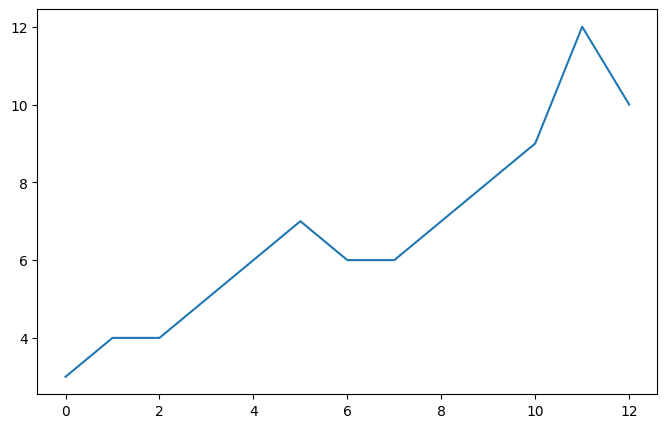

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(data)
plt.show()

In [4]:
print(data[1:])
print(data[:-1])

[4, 4, 5, 6, 7, 6, 6, 7, 8, 9, 12, 10]
[3, 4, 4, 5, 6, 7, 6, 6, 7, 8, 9, 12]


In [5]:
# Алгоритм теста Дики-Фуллера

first_order_diff = np.array(data[1:]) - np.array(data[:-1])
delta_yt = first_order_diff
yt_1 = np.append(delta_yt[1:], delta_yt[-1])    #yt-1

alpha = 0.5
gamma = 0.2
se = sum((delta_yt - (1*alpha + gamma*yt_1))**2)
df = gamma / se

print('delta yt =', delta_yt)
print('yt-1 =', yt_1)
print('Alpha =', alpha)
print('Gamma =', gamma)
print('SE =', se)
print('DF =', df)

if df < -2.89: # критического значение для 10% уровня значимости
  print('Временной ряд стационарен.')
else:
  print('Временной ряд не стационарен.')

delta yt = [ 1  0  1  1  1 -1  0  1  1  1  3 -2]
yt-1 = [ 0  1  1  1 -1  0  1  1  1  3 -2 -2]
Alpha = 0.5
Gamma = 0.2
SE = 17.16
DF = 0.011655011655011656
Временной ряд не стационарен.


In [6]:
# Тест Дики-Фуллера (statsmodels)

from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print('ADF статистика:', result[0])
print('p-значение:', result[1])
print('Критические значения:')
for key, value in result[4].items():
    print(f'  {key}: {value}')

if result[1] < 0.05:
  print('Временной ряд стационарен.')
else:
  print('Временной ряд не стационарен.')

ADF статистика: -0.9753836234744065
p-значение: 0.7621363564361012
Критические значения:
  1%: -4.137829282407408
  5%: -3.1549724074074077
  10%: -2.7144769444444443
Временной ряд не стационарен.


# Метод Хольта

In [7]:
data = [3, 4, 4, 5, 6, 7, 6, 6, 7, 8, 9, 12, 10]

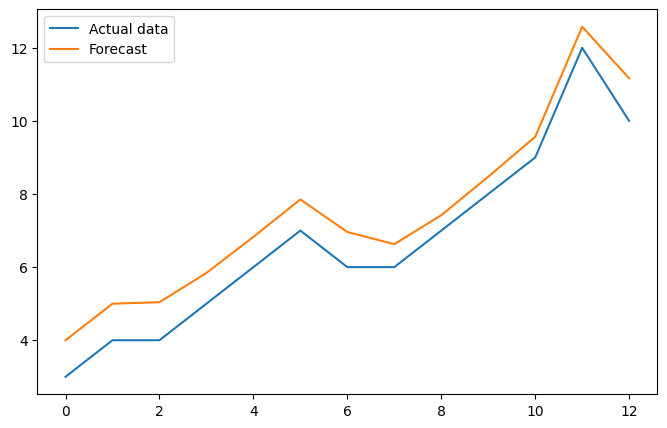

In [8]:
# Алгоритм метода Хольта

y = np.array(data)
alpha = 0.8
beta = 0.2

initial_level = data[0]
initial_trend = data[1] - data[0]

len_row = len(data)
l = np.zeros(len_row)
b = np.zeros(len_row)
l[0] = initial_level
b[0] = initial_trend

for i in range(1, len_row):
  l[i] = alpha * y[i] + (1 - alpha) * (l[i-1] + b[i-1])
  b[i] = beta * (l[i] - l[i-1]) + (1 - beta) * b[i-1]
forecast = l + b


plt.figure(figsize=(8, 5))
plt.plot(data, label='Actual data')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

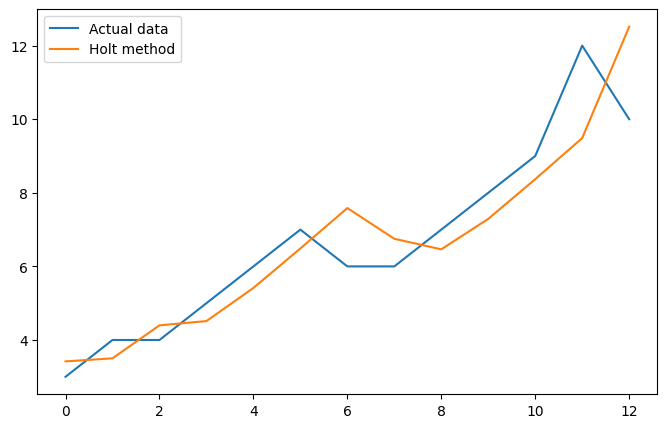

In [9]:
# Метод Хольта (statsmodels)

from statsmodels.tsa.api import Holt

fit = Holt(data, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)

plt.figure(figsize=(8, 5))
plt.plot(data, label='Actual data')
plt.plot(fit.fittedvalues, label='Holt method')
plt.legend()
plt.show()

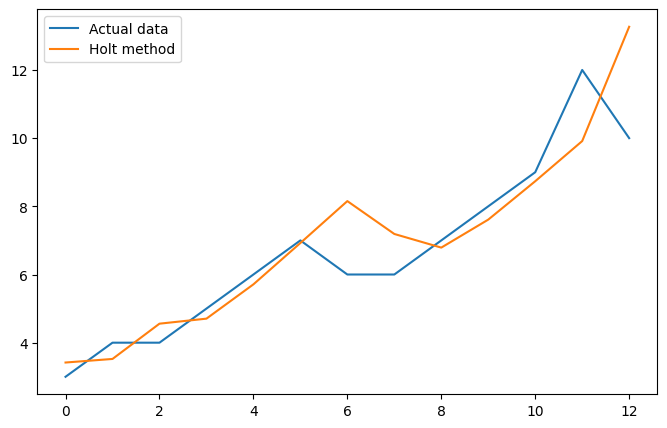

In [10]:
# Метод Хольта (statsmodels)

from statsmodels.tsa.api import Holt

fit = Holt(data, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)

plt.figure(figsize=(8, 5))
plt.plot(data, label='Actual data')
plt.plot(fit.fittedvalues, label='Holt method')
plt.legend()
plt.show()